# <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:200%;text-align:center;border-radius:10px 10px;">Food Classification using Deep Learning</p>

<p style="font-family:newtimeroman;font-size:120%;color:#F76E11;">I hope this kernel helpful and some UPVOTES would be very much appreciated</p>

<a id='top'></a>
<p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
1. [IMPORTING LIBRARIES](#1)

2. [LOADING DATA](#2)

3. [BUILDING MODEL](#3)

4. [TRANSFER LEARNING USING INCEPTIONV3](#4)

5. [PLOTTING MODEL TRAINING AND VALIDATION RESULT](#5)

6. [SAVING MODEL](#6)

7. [PREDICTION](#7)


<a id="1"></a>
# <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

<p style="font-family:newtimeroman;color:#F76E11;font-size:150%">The following Libraries will be used in the notebook.</p>

In [15]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

<a id="2"></a>
# <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

<p style="font-family:newtimeroman;color:#F76E11;font-size:150%">
    Here I will using Food41 Image datasets. This dataset contains 101000 images and 101 different foods.
</p>

In [16]:
data_dir = '/kaggle/input/food41/images/'

data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 101000 files belonging to 101 classes.


In [17]:
# Create an ImageDataGenerator and do Image Augmentation
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [18]:
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [19]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [20]:
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 101 ....


<p style="font-family:newtimeroman;color:#F76E11;font-size:150%">
    Now that I have the dataset loaded, let us have a look at a few images.
</p>

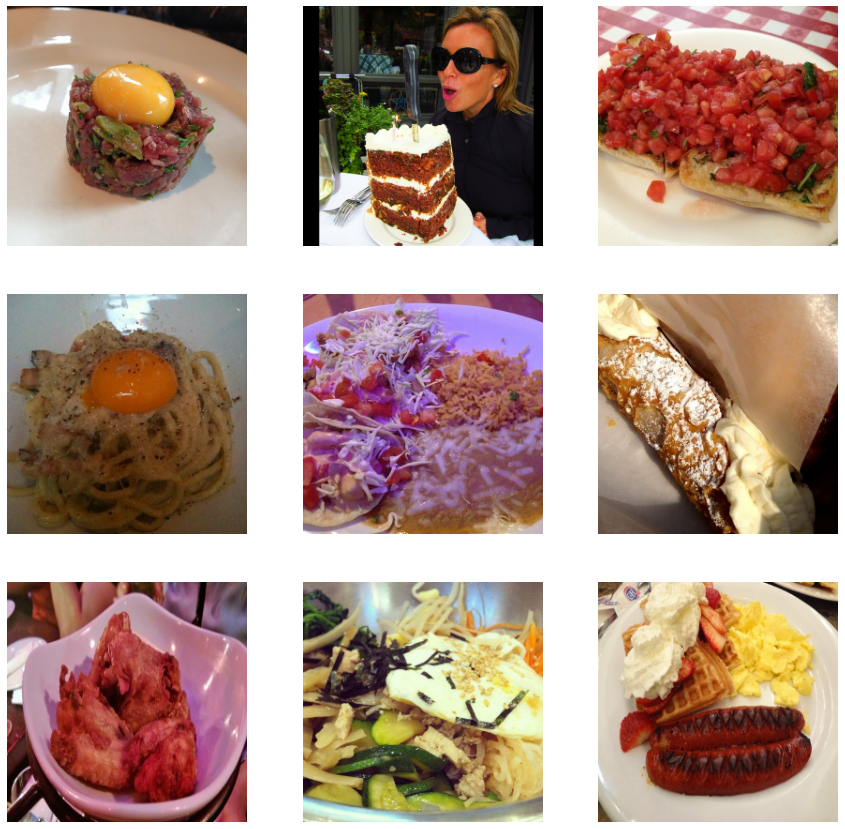

In [21]:
#Defing a function to see images
def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

#Plotting the images in dataset
show_img(data)

<a id="3"></a>
# <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">BUILDING MODEL</p>

<p style="font-family:newtimeroman;color:#F76E11;font-size:150%">
    Here I will be using pre-trained model, which can be done using Transfer Learning. The reuse of a previously learned model on a new problem is known as transfer learning. It’s particularly popular in deep learning right now since it can train deep neural networks with a small amount of data. This is particularly valuable in the field of data science, as most real-world situations do not require millions of labelled data points to train complicated models. 
</p>

Reference : [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/10/understanding-transfer-learning-for-deep-learning/)

<a id="4"></a>
# <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">TRANSFER LEARNING USING INCEPTION V3</p>

<p style="font-family:newtimeroman;color:#F76E11;font-size:150%">Inception is a convolutional neural network architecture introduced by Google which achieved top results in ImageNet Large Scale Visual Recognition Challenge 2014.</p>

![](https://camo.githubusercontent.com/d93725579fc7e7140a60faadaaf47ae93eda84b6/68747470733a2f2f7777772e50657465724d6f7373416d6c416c6c52657365617263682e636f6d2f6d656469612f696d616765732f7265706f7369746f726965732f434e4e2e6a7067)

Image Source: [Intel](https://www.intel.com/content/www/us/en/developer/articles/technical/inception-v3-deep-convolutional-architecture-for-classifying-acute-myeloidlymphoblastic.html)

## <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">Training Model</p>

In [22]:
# load pre-trained InceptionV3
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers:
    layer.trainable = False

In [23]:
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 228, 228, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 113, 113, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 113, 113, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 113, 113, 32) 0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

In [25]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 2,
                    verbose = 1)

Epoch 1/2
2525/2525 [==============================] - 1482s 586ms/step - loss: 2.8825 - accuracy: 0.3464 - val_loss: 2.3687 - val_accuracy: 0.4238
Epoch 2/2
2525/2525 [==============================] - 1503s 595ms/step - loss: 2.4687 - accuracy: 0.4024 - val_loss: 2.3045 - val_accuracy: 0.4327


<a id="5"></a>
# <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">PLOTTING MODEL TRAINING AND VALIDATION RESULT</p>

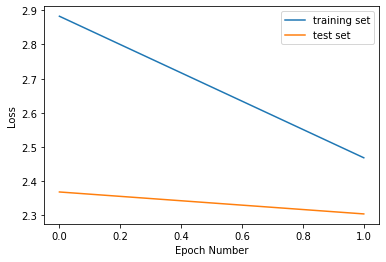

In [26]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

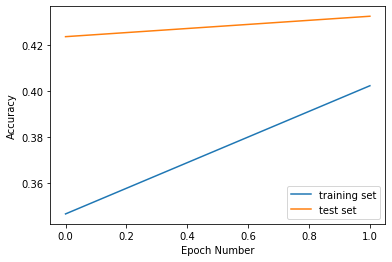

In [27]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

<a id="6"></a>
# <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">SAVING MODEL</p>

<p style="font-family:newtimeroman;font-size:120%;color:#F76E11;">Let's save model for future.</p>

In [28]:
model_name = 'food_recognition_inceptionV3.h5'
model.save(model_name, save_format='h5')

<a id="7"></a>
# <p style="background-color:#1C658C;font-family:newtimeroman;color:#EEEEEE;font-size:150%;text-align:center;border-radius:10px 10px;">PREDICTION</p>

<p style="font-family:newtimeroman;font-size:120%;color:#F76E11;">Let's check how accurate is our model.</p>

In [29]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [38]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Object Detected As - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

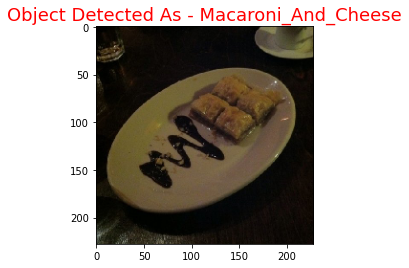

In [39]:
predict_image('/kaggle/input/food41/images/baklava/1034361.jpg', model)

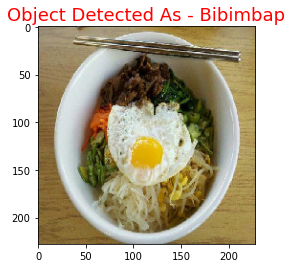

In [40]:
predict_image('/kaggle/input/food41/images/bibimbap/1014434.jpg', model)

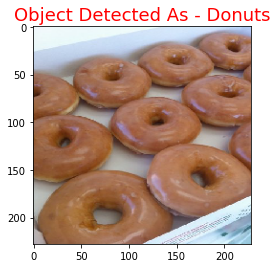

In [41]:
predict_image('/kaggle/input/food41/images/donuts/104498.jpg', model)

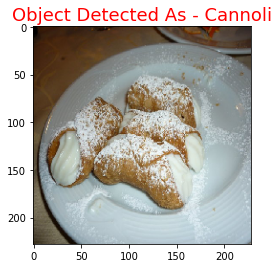

In [42]:
predict_image('/kaggle/input/food41/images/cannoli/109727.jpg', model)